### Getting data from yann lecunn dataset

Yann Lecunn dataset is of the format idx and split across 4 files
1. train-images.idx3-ubyte : training image set which consists of 60000 images each image is represented by a 28*28 array
2. train-labels.idx1-ubyte : training label set which consists of 60000 labels 
3. t10k-images.idx3-ubyte : test image set which consists of 10000 images each image is represented by a 28*28
4. t10k-labels.idx1-ubyte : training label set which consists of 10000 labels

In [1]:
import idx2numpy
import seaborn as sns

#### Extract Training data

In [2]:
X_train_3D = idx2numpy.convert_from_file('train-images.idx3-ubyte')
X_train = X_train_3D.flatten().reshape(60000,784)

y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

In [3]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
X_train.shape

(60000, 784)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
y_train.shape

(60000,)

#### Extract Test data

In [7]:
X_test_3D = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
X_test =  X_test_3D.flatten().reshape(10000,784)

y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [8]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
X_test.shape

(10000, 784)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
y_test.shape

(10000,)

#### Function to display a digit image from one 1-d representation of pixels

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def display(image,label):
    """image is a 1*784 numpy array"""
   
    image = image.reshape(28,28)
    sns.heatmap(image,linewidth=0,xticklabels=False,yticklabels=False)
    #plt.imshow(image, cmap = plt.cm.gray_r, interpolation="nearest")
    plt.title("Image Representation for %d" %(label))
    plt.show()

##### Displaying a set of digits

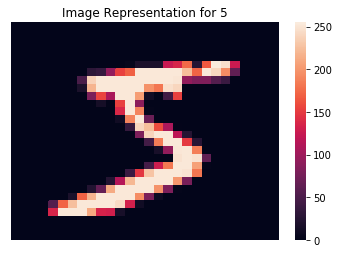

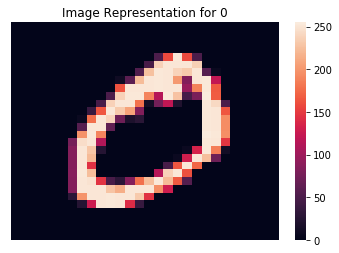

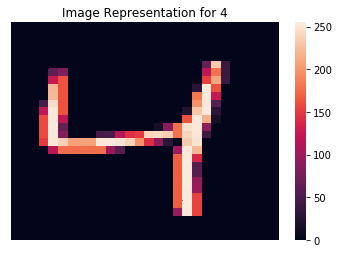

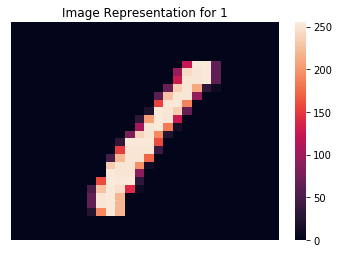

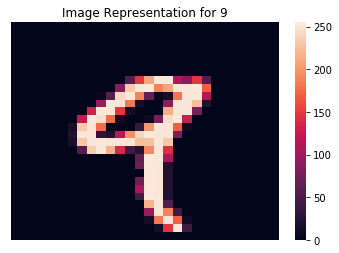

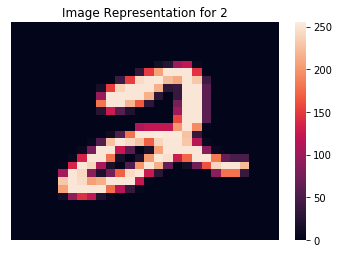

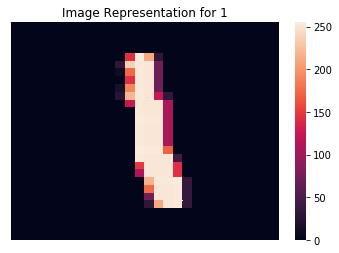

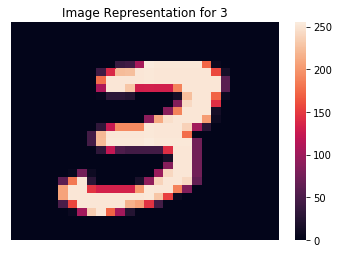

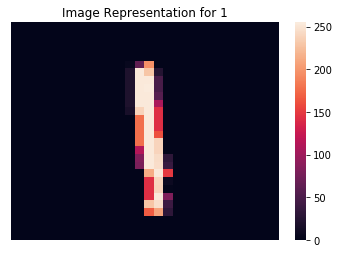

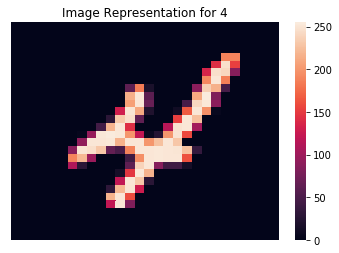

In [13]:
for i in range(10):
    display(X_train[i],y_train[i])

# Random Forest  classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict


rf_clf = RandomForestClassifier(max_depth=5, random_state=0)

y_train_pred = cross_val_predict(rf_clf, X_train, y_train, cv=3)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

##### Calculate Cross Validation Score

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.8129874 ,  0.79293965,  0.81307196])

y_train_pred is the predicted values in the train set such that the model has never seen the data before

In [16]:
y_train_pred

array([3, 0, 4, ..., 5, 6, 2], dtype=uint8)

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**Create a confusion matrix for cross validation prediction & actual labels**

In [18]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_train, y_train_pred)

In [19]:
confusionMatrix

array([[5503,    2,   54,   38,    5,   60,   79,   24,  154,    4],
       [   2, 6549,   33,   30,    4,   21,   17,   23,   53,   10],
       [ 117,  262, 4768,  139,   80,   37,  208,  158,  134,   55],
       [  99,  238,  211, 4659,   48,  252,   87,  161,  161,  215],
       [  36,   55,   58,   24, 4401,   33,  183,  138,  115,  799],
       [ 206,  199,   48,  718,  116, 3398,  214,  108,  143,  271],
       [ 116,   71,  119,   28,   94,   85, 5333,   13,   57,    2],
       [  58,  193,  125,   19,  105,    7,   16, 5374,   63,  305],
       [  30,  532,  215,  323,   98,  110,  146,   71, 4065,  261],
       [  48,  120,   63,  116,  481,   43,   35,  608,  105, 4330]], dtype=int64)

**Plot the Confusion matrix showing the diagonals.**

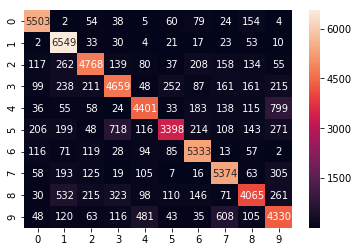

In [20]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [21]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

In [22]:
import numpy as np
#import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)

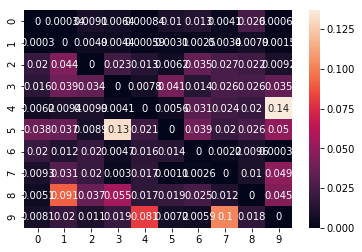

In [23]:
ax = sns.heatmap(norm_conf_mx,annot=True)

**Plot Confusion Matrix against Test data**

In [24]:
y_test_pred = rf_clf.predict(X_test)
y_test_pred

array([7, 2, 1, ..., 4, 8, 6], dtype=uint8)

In [25]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 938,    2,    3,    6,    0,   16,    5,    4,    6,    0],
       [   0, 1105,   11,    3,    0,    1,    3,    1,   10,    1],
       [  21,   42,  850,   17,    9,    2,   34,   23,   26,    8],
       [  13,   37,   21,  806,    8,   23,   14,   21,   36,   31],
       [   4,    8,    1,    1,  713,    1,   37,   50,   26,  141],
       [  28,   23,    4,  152,   23,  529,   33,   18,   37,   45],
       [  37,    9,    8,    1,   24,   18,  840,   13,    8,    0],
       [   7,   35,   49,    5,   25,    2,    2,  833,   24,   46],
       [   7,   42,   23,   49,   19,   13,   26,    8,  738,   49],
       [   5,   14,    5,   15,   87,    7,   17,   55,   20,  784]], dtype=int64)

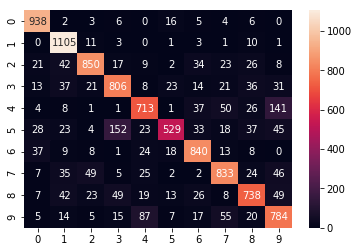

In [26]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [27]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

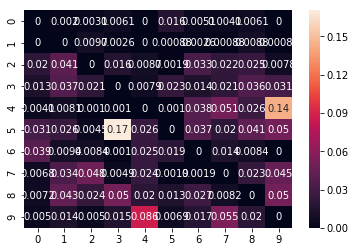

In [28]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.81359999999999999